In [8]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import imageio
from scipy import ndimage

In [9]:
#Functions used in Phase I

#Define RGB2gray function
def rgb2gray(img) :
    return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

#Detemine gradient function for Fx and Fy using sobel filter(normlized)
def gradient_x(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]))
    return grad_img/np.max(grad_img)

def gradient_y(img) :
    grad_img = ndimage.convolve(img, np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]))
    return grad_img/np.max(grad_img)

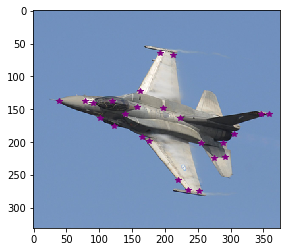

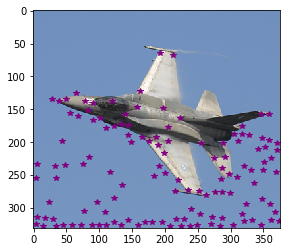

In [31]:
#Harris Corner Detector Implementation and test

img_path = '../data/test1.bmp'
#test1.bmp
#test2.jpg

ratio = 0.02

#Phase I : Find filtered grdient
#Load the input image
input_img = imageio.imread(img_path)

#Convert the image to grayscale
gray_input_img = rgb2gray(input_img)

#Apply gaussian blurring
blur_img = ndimage.gaussian_filter(gray_input_img, sigma = 1.0)

#Find gradient Fx
x_grad = gradient_x(blur_img)

#Find gradient Fy
y_grad = gradient_y(blur_img)

    
#Phase II : Find corners
xx_grad = x_grad * x_grad
yy_grad = y_grad * y_grad
xy_grad = x_grad * y_grad
tuple_data = [] #Contains y, x Co-ordinates and its corner response
k = 0.05
max = 0

for i in range(1, int(input_img.shape[0] - 1)) :
        for j in range(1, int(input_img.shape[1] - 1)) :
            window_x = xx_grad[i-4 : i+5 , j-4 : j+5]
            window_y = yy_grad[i-4 : i+5 , j-4 : j+5]
            window_xy = xy_grad[i-4 : i+5 , j-4 : j+5]
            sum_xx = np.sum(window_x)
            sum_yy = np.sum(window_y)
            sum_xy = np.sum(window_xy)
            determinant = (sum_xx * sum_yy) - (sum_xy * sum_xy)
            trace = sum_xx + sum_yy
            R = determinant - (k * trace * trace)
            tuple_data.append((i, j, R))
            if(R > max) :
                max = R

#L contains y, x co-ordinate(whose value is greater than threshold) and their corner response of those co-ordinates
L = []
L2 = []
threshold = ratio * max

for res in tuple_data :
    i, j, R = res
    L2.append([i, j, R])    #without using thresholding
    if R > threshold :
        L.append([i, j, R]) #using thresholding

      


#Phase III : Non maximal suppression
sorted_L = sorted(L, key = lambda x: x[2], reverse = True)
final_L = [] #final_l contains list after non maximal suppression
final_L.append(sorted_L[0][:-1])
dis = 10
xc, yc = [], []
for i in sorted_L :
    for j in final_L :
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else :
        final_L.append(i[:-1])
        xc.append(i[1])
        yc.append(i[0])

        
sorted_L2 = sorted(L2, key = lambda x: x[2], reverse = True)
final_L2 = [] #final_l contains list after non maximal suppression
final_L2.append(sorted_L2[0][:-1])
xc2, yc2 = [], []
for i in sorted_L2 :
    for j in final_L2 :
        if(abs(i[0] - j[0] <= dis) and abs(i[1] - j[1]) <= dis) :
            break
    else :
        final_L2.append(i[:-1])
        xc2.append(i[1])
        yc2.append(i[0])

#using thresholding
plt.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc, yc, '*', color='purple')
plt.show()

#without using thresholding
plt.imshow(input_img, cmap = plt.get_cmap('gray'))
plt.plot(xc2, yc2, '*', color='purple')
plt.show()

